In [1]:
# random forest regressor on 20m resolution images

import numpy as np
import pandas as pd
import sklearn
import math

In [3]:
df = pd.read_csv(r"./../dataset-Icheon&CHL/2000_20m_final_20221108.csv", low_memory = False)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279 entries, 0 to 278
Data columns (total 42 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   279 non-null    int64  
 1   xcoord(long)         279 non-null    float64
 2   ycoord(lat)          279 non-null    float64
 3   sampling date        279 non-null    object 
 4   sensing date         279 non-null    object 
 5   B2                   279 non-null    int64  
 6   B3                   279 non-null    int64  
 7   B4                   279 non-null    int64  
 8   B5                   279 non-null    int64  
 9   B6                   279 non-null    int64  
 10  B7                   279 non-null    int64  
 11  B8A                  279 non-null    int64  
 12  B11                  279 non-null    int64  
 13  B12                  279 non-null    int64  
 14  NDVI                 279 non-null    float64
 15  BSI                  279 non-null    flo

In [5]:
df = pd.DataFrame(df[['B2','B3','B4','B5','B6','B7','B8A','B11','B12','NDVI','BSI','EVI','AVI','SAVI','NDMI','SWHC','Sand (%)','Silt (%)','Clay (%)','SOC']])

In [6]:
df.head()

,B2,B3,B4,B5,B6,B7,B8A,B11,B12,NDVI,BSI,EVI,AVI,SAVI,NDMI,SWHC,Sand (%),Silt (%),Clay (%),SOC
0,2020,2555,3095,3264,3774,4137,4234,5107,4041,0.155410,0.134754,0.371979,-2461.869129,0.233099,-0.093459,0.70,68.0,30.5,1.6,0.71
1,1640,2002,2397,2781,3036,3232,3188,3986,3095,0.141629,0.138703,0.375166,-1821.351929,0.212425,-0.111235,0.70,68.0,30.5,1.6,0.71
2,1929,2325,2793,3124,3434,3429,3635,4849,3928,0.130989,0.157353,0.355184,-2044.453828,0.196469,-0.143093,0.70,68.0,30.5,1.6,0.71
3,2387,2955,3646,3441,4298,4607,4869,5624,4324,0.143629,0.121869,0.345734,-2789.467172,0.215431,-0.071953,0.70,68.0,30.5,1.6,0.71
4,3075,3914,4958,5340,5515,5755,5967,6441,4969,0.092357,0.115307,0.199352,-3101.858919,0.138529,-0.038201,0.75,75.2,23.6,1.2,0.86


In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [8]:
# normalize1
# band 값만 10000으로 나누기
df['B2'] = df['B2']/10000
df['B3'] = df['B3']/10000
df['B4'] = df['B4']/10000
df['B5'] = df['B5']/10000
df['B6'] = df['B6']/10000
df['B7'] = df['B7']/10000
df['B8A'] = df['B8A']/10000
df['B11'] = df['B11']/10000
df['B12'] = df['B12']/10000


In [9]:
df['AVI'] = df['AVI']/10000
print(df)

         B2      B3      B4      B5      B6      B7     B8A     B11     B12  \
0    0.2020  0.2555  0.3095  0.3264  0.3774  0.4137  0.4234  0.5107  0.4041   
1    0.1640  0.2002  0.2397  0.2781  0.3036  0.3232  0.3188  0.3986  0.3095   
2    0.1929  0.2325  0.2793  0.3124  0.3434  0.3429  0.3635  0.4849  0.3928   
3    0.2387  0.2955  0.3646  0.3441  0.4298  0.4607  0.4869  0.5624  0.4324   
4    0.3075  0.3914  0.4958  0.5340  0.5515  0.5755  0.5967  0.6441  0.4969   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
274  0.2027  0.2407  0.2756  0.3122  0.3377  0.3449  0.3649  0.4283  0.3924   
275  0.1895  0.2369  0.2891  0.3165  0.3277  0.3394  0.3603  0.4378  0.3873   
276  0.1819  0.2208  0.2595  0.2881  0.3015  0.3146  0.3342  0.3940  0.3566   
277  0.2043  0.2483  0.2853  0.3178  0.3425  0.3555  0.3656  0.4255  0.3901   
278  0.1891  0.2344  0.2834  0.3052  0.3162  0.3352  0.3576  0.3887  0.3244   

         NDVI       BSI       EVI       AVI      SA

In [10]:
x = df.iloc[:, :-1]
print(x)

         B2      B3      B4      B5      B6      B7     B8A     B11     B12  \
0    0.2020  0.2555  0.3095  0.3264  0.3774  0.4137  0.4234  0.5107  0.4041   
1    0.1640  0.2002  0.2397  0.2781  0.3036  0.3232  0.3188  0.3986  0.3095   
2    0.1929  0.2325  0.2793  0.3124  0.3434  0.3429  0.3635  0.4849  0.3928   
3    0.2387  0.2955  0.3646  0.3441  0.4298  0.4607  0.4869  0.5624  0.4324   
4    0.3075  0.3914  0.4958  0.5340  0.5515  0.5755  0.5967  0.6441  0.4969   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
274  0.2027  0.2407  0.2756  0.3122  0.3377  0.3449  0.3649  0.4283  0.3924   
275  0.1895  0.2369  0.2891  0.3165  0.3277  0.3394  0.3603  0.4378  0.3873   
276  0.1819  0.2208  0.2595  0.2881  0.3015  0.3146  0.3342  0.3940  0.3566   
277  0.2043  0.2483  0.2853  0.3178  0.3425  0.3555  0.3656  0.4255  0.3901   
278  0.1891  0.2344  0.2834  0.3052  0.3162  0.3352  0.3576  0.3887  0.3244   

         NDVI       BSI       EVI       AVI      SA

In [11]:
y = df.iloc[:, -1:]

In [12]:
print(y)

      SOC
0    0.71
1    0.71
2    0.71
3    0.71
4    0.86
..    ...
274  3.22
275  3.30
276  3.30
277  3.30
278  2.51

[279 rows x 1 columns]


In [13]:
x_train, x_test, y_train, y_test = train_test_split(x.values, y.values, test_size=0.25)

In [14]:
##########모델 생성

model = RandomForestRegressor()

In [15]:
### Tree 최적화


In [16]:
##########모델 학습

model.fit(x_train, y_train.ravel())

RandomForestRegressor()

In [17]:
##########모델 검증
# R-squared

print(model.score(x_train, y_train)) #

print(model.score(x_test, y_test)) #

0.9820389929446982
0.9028357329063608


In [18]:
# R-squared

model.score(x.values,y.values)

0.9598766082645459

In [19]:
print(x.values.shape)
print(model.predict(x.values).shape)
print(y.values.shape)

(279, 19)
(279,)
(279, 1)


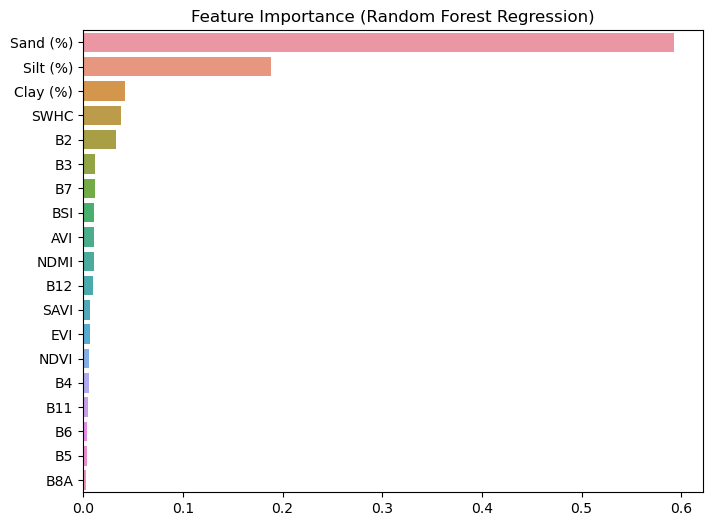

In [20]:
# feature importance

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
 
ftr_importances_values = model.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=x.columns)
ftr_top = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8, 6))
sns.barplot(x=ftr_top, y=ftr_top.index)
plt.title('Feature Importance (Random Forest Regression)')
plt.show()

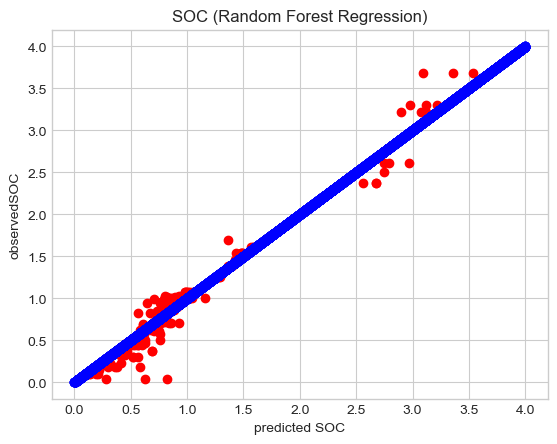

In [21]:
# Predicted versus observed SOC
plt.style.use('seaborn-whitegrid')
fig = plt.figure()
X_grid = np.linspace(math.floor(min(model.predict(x.values))), math.ceil(max(model.predict(x.values))),10000)  # X의 최소값부터 X의 최대값까지 0.01 단위로 값 채우기
#X_grid = X_grid.reshape((len(X_grid),1))  # n X 1 행렬로 변환
plt.scatter(model.predict(x.values), y.values, color='red')
plt.scatter(X_grid,X_grid, color='blue')
plt.title('SOC (Random Forest Regression)')
plt.xlabel('predicted SOC')
plt.ylabel('observedSOC')
plt.show()